## PRODUCT SALES FOR E COMPANY

### appendix 
-click on links: 

> <a href=#imports>Import libraries</a>

> <a href=#load>Load data</a>

> <a href=#formating>Data formating</a>


> <a href=#EDA>Explratory data analysis</a>

> <a href=#Questions>Questions</a>

> <a href=#Qun>Qunclosion</a>

# <a name=imports> Import libraries</a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 
#%config InlineBackend.figure_format = 'svg'

# <a name=load>Load data</a>

In [2]:
df = pd.read_csv('Sales_April_2019.csv',
                delimiter=';',
                 na_values=' '
                 )

In [3]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18383 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          18324 non-null  object
 1   Product           18324 non-null  object
 2   Quantity Ordered  18324 non-null  object
 3   Price Each        18324 non-null  object
 4   Order Date        18324 non-null  object
 5   Purchase Address  18324 non-null  object
dtypes: object(6)
memory usage: 861.8+ KB


# <a name=formating>Data formating</a>

In [5]:
# i need to change data format of four colums :order id ,Order Date, Quantity Ordered,Price Each 
df['Order ID'] = pd.to_numeric(df['Order ID'], errors='coerce')


In [7]:
#put date in new col
df['Date'] = df['Order Date'].str.split(' ').str[0]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date
0,176558.0,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04/19/19
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559.0,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04/07/19
3,176560.0,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04/12/19
4,176560.0,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04/12/19


In [8]:
df['Date'] = pd.to_datetime(df['Date'],format='%m/%d/%y', errors='coerce')

In [9]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')

In [10]:
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18383 entries, 0 to 18382
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          18289 non-null  float64       
 1   Product           18324 non-null  object        
 2   Quantity Ordered  18289 non-null  float64       
 3   Price Each        18289 non-null  float64       
 4   Order Date        18324 non-null  object        
 5   Purchase Address  18324 non-null  object        
 6   Date              18289 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 1005.4+ KB


# <a name=EDA>Explratory data analysis(EDA)</a>

In [12]:
df.describe()

,Order ID,Quantity Ordered,Price Each
count,18289.000000,18289.00000,18289.000000
mean,185328.816720,1.12461,184.431026
std,5061.520829,0.43641,330.913377
min,176558.000000,1.00000,2.990000
25%,180952.000000,1.00000,11.950000
50%,185328.000000,1.00000,14.950000
75%,189706.000000,1.00000,150.000000
max,194094.000000,7.00000,1700.000000


In [13]:
#find how many null valuse in each column

df.isna().sum(axis=0)

Order ID            94
Product             59
Quantity Ordered    94
Price Each          94
Order Date          59
Purchase Address    59
Date                94
dtype: int64

In [14]:
df.shape

(18383, 7)

In [15]:
#drop null values 

df.dropna(how='all', inplace=True)

In [16]:
df.shape

(18324, 7)

In [17]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19
2,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07
3,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12
4,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12
5,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30
...,...,...,...,...,...,...,...
18378,194090.0,Google Phone,1.0,600.00,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001",2019-04-08
18379,194091.0,AA Batteries (4-pack),1.0,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301",2019-04-15
18380,194092.0,AAA Batteries (4-pack),2.0,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016",2019-04-28
18381,194093.0,AA Batteries (4-pack),1.0,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035",2019-04-14


In [18]:
#after del null values
df.isna().sum(axis=0)

Order ID            35
Product              0
Quantity Ordered    35
Price Each          35
Order Date           0
Purchase Address     0
Date                35
dtype: int64

In [19]:
#show duplicated data 
df.loc[df.duplicated(), :].head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date
31,176585.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",2019-04-07
1149,NaN,Product,NaN,NaN,Order Date,Purchase Address,NaT
1155,NaN,Product,NaN,NaN,Order Date,Purchase Address,NaT
1302,177795.0,Apple Airpods Headphones,1.0,150.00,04/27/19 19:45,"740 14th St, Seattle, WA 98101",2019-04-27
1684,178158.0,USB-C Charging Cable,1.0,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016",2019-04-28


In [20]:
#to del raw based on spesific val
drop_row = df[df['Product'] == 'Product'].index
 
# Delete these row 
df.drop(drop_row , inplace=True)

In [21]:
df['Product'].value_counts()

Lightning Charging Cable      2201
USB-C Charging Cable          2079
AA Batteries (4-pack)         2063
AAA Batteries (4-pack)        1989
Wired Headphones              1890
Apple Airpods Headphones      1515
Bose SoundSport Headphones    1280
27in FHD Monitor               734
iPhone                         693
34in Ultrawide Monitor         650
Google Phone                   581
27in 4K Gaming Monitor         563
Flatscreen TV                  458
Macbook Pro Laptop             453
ThinkPad Laptop                392
20in Monitor                   390
Vareebadd Phone                220
LG Dryer                        77
LG Washing Machine              61
Name: Product, dtype: int64

In [22]:
sum(df.duplicated())

22

In [23]:
df.drop_duplicates(subset=['Order ID'], keep='first', inplace=True)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19
2,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07
3,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12
5,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30
6,176562.0,USB-C Charging Cable,1.0,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",2019-04-29
...,...,...,...,...,...,...,...
18378,194090.0,Google Phone,1.0,600.00,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001",2019-04-08
18379,194091.0,AA Batteries (4-pack),1.0,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301",2019-04-15
18380,194092.0,AAA Batteries (4-pack),2.0,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016",2019-04-28
18381,194093.0,AA Batteries (4-pack),1.0,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035",2019-04-14


In [24]:
sum(df.duplicated())

0

In [25]:
#to make sure no missing val in our dataset
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Order ID - 0%
Product - 0%
Quantity Ordered - 0%
Price Each - 0%
Order Date - 0%
Purchase Address - 0%
Date - 0%


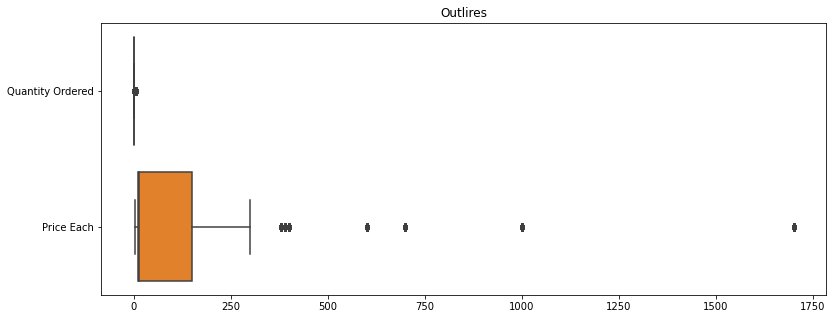

In [26]:

#Outliers

plt.figure(figsize=(13,5))
sns.boxplot(data=df[['Quantity Ordered', 'Price Each']], orient='h')
plt.title("Outlires")
plt.show()

In [27]:
#use mask to see -- outliers are price of product --
mask=(df['Price Each']>600)
df[mask]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date
9,176565.0,Macbook Pro Laptop,1.0,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",2019-04-24
26,176581.0,iPhone,1.0,700.00,04/09/19 21:38,"84 Jackson St, Boston, MA 02215",2019-04-09
55,176608.0,iPhone,1.0,700.00,04/11/19 12:01,"15 Cherry St, San Francisco, CA 94016",2019-04-11
80,176633.0,ThinkPad Laptop,1.0,999.99,04/23/19 14:03,"863 Hickory St, Los Angeles, CA 90001",2019-04-23
86,176639.0,Macbook Pro Laptop,1.0,1700.00,04/28/19 16:14,"853 Cedar St, San Francisco, CA 94016",2019-04-28
...,...,...,...,...,...,...,...
18313,194028.0,ThinkPad Laptop,1.0,999.99,04/15/19 00:47,"24 Main St, New York City, NY 10001",2019-04-15
18340,194054.0,iPhone,1.0,700.00,04/21/19 20:18,"533 14th St, Los Angeles, CA 90001",2019-04-21
18342,194056.0,iPhone,1.0,700.00,04/10/19 10:05,"280 7th St, San Francisco, CA 94016",2019-04-10
18348,194061.0,iPhone,1.0,700.00,04/14/19 20:22,"209 6th St, Atlanta, GA 30301",2019-04-14


# <a name=Questions>Questions</a>

What product sold the most?

Text(0, 0.5, 'count')

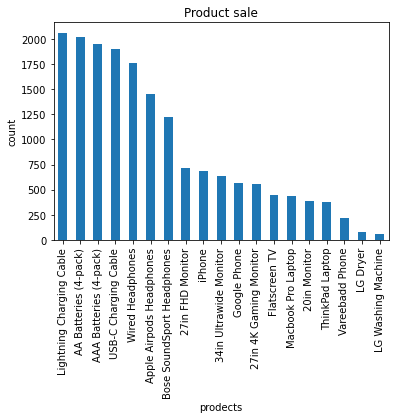

In [28]:
df['Product'].value_counts().plot(kind='bar')
plt.title("Product sale")
plt.xlabel("prodects")
plt.ylabel("count")


At any day seles increased?

Text(0, 0.5, 'count')

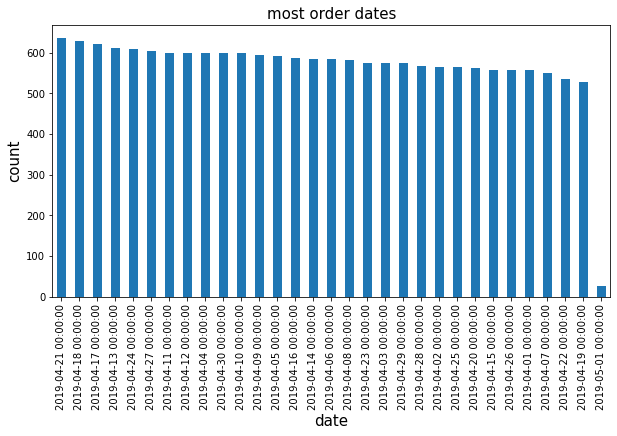

In [75]:
df['Date'].value_counts().plot(kind='bar',figsize=(10,5))
plt.title("most order dates",fontsize=15 )
plt.xlabel("date",fontsize=15)
plt.ylabel("count",fontsize=15 )

 what is the highest day have earning in this month?

In [37]:
df["total"] = df["Price Each"] * df["Quantity Ordered"]


In [81]:
df.groupby('Date')['total'].sum().sort_values(ascending=False)

Text(0, 0.5, 'price')

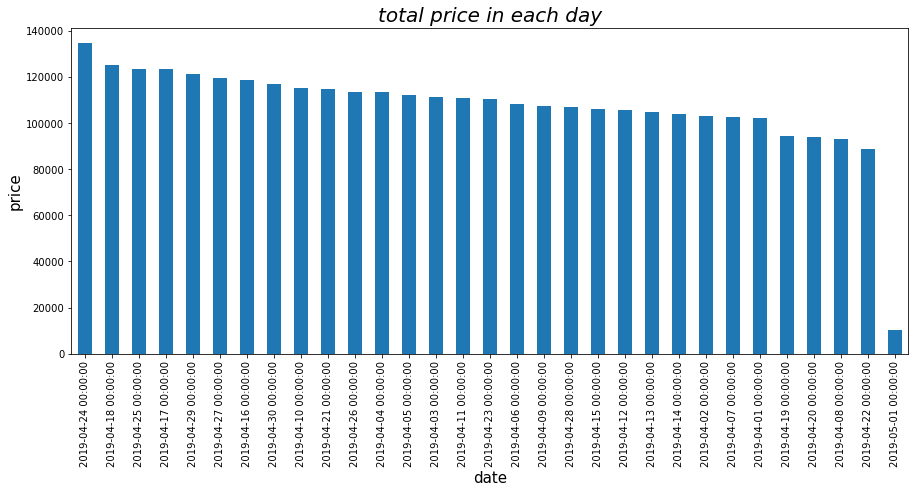

In [63]:
#plt.figure(figsize = (20,20)
df.groupby('Date')['total'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(15,6))
plt.title("total price in each day",style='italic' ,fontsize=20 )
plt.xlabel("date",fontsize=15 )
plt.ylabel("price",fontsize=15)

# <a name=Qun>Qunclosion</a>